In [3]:
import pandas as pd
tweet=pd.read_csv("D:/安装包/clean_tweets.txt",sep='\t',names=['date','text','loc','author'])
tweet.head()

,date,text,loc,author
0,2020-01-12 12:30:00,The diving bell spider or water spider is the ...,CHINA,CCTV
1,2020-01-22 03:00:16,Faced with the fastchanging situation of the n...,CHINA,CCTV
2,2020-01-24 10:57:46,The central China metropolitan of Wuhan will f...,CHINA,CCTV
3,2020-01-27 06:00:07,Medical teams from across China left for Wuhan...,CHINA,CCTV
4,2020-01-27 08:00:12,Many places across China have taken strict con...,CHINA,CCTV


In [4]:
tweet['date'] = pd.to_datetime(tweet['date'])
tweet['Month'] = tweet['date'].dt.month

In [21]:
from wordcloud import WordCloud, STOPWORDS  #词云图
import matplotlib.pyplot as plt 
import imageio

#绘制推文内容的词云
STOPWORDS.add('covid')  #将https加入停用词表
STOPWORDS.add('coronavirus')
STOPWORDS.add('covid19')
STOPWORDS.add('pandemic')
STOPWORDS.add('will')
STOPWORDS.add('corona')
STOPWORDS.add('epidemic')
STOPWORDS.add('gt')
STOPWORDS.add('direct')

STOPWORDS.add('france')  
STOPWORDS.add('china')
STOPWORDS.add('uk')
STOPWORDS.add('us')
STOPWORDS.add('germany')
STOPWORDS.add('brazil')
STOPWORDS.add('spain')

#定义函数：绘制词云图
def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)    #创建停用词元素集
    
    for val in text:    #遍历text中的值
        val = str(val)  #将每个值转换成字符串
        tokens = val.split()    #分割值
        for i in range(len(tokens)):    
            tokens[i] = tokens[i].lower()   #遍历分割后的字符串，并将每个词转换成小写

        for words in tokens: 
            comment_words = comment_words + str(words) + ' '   #遍历字符串中的所有词,将每个词用空格隔开
            
    image = imageio.imread('D:/ProgramData/notebook/爬虫实践/网易云评论/111.png')
    
    wordcloud = WordCloud(width=image.shape[0], 
                          height=image.shape[1],    #生成词云
                          background_color ='white', 
                          stopwords = stopwords, 
                          font_path='msyh.ttc',
                          mask=image,
                          scale=3,
                          min_font_size = 10).generate(comment_words) 

    #绘制词云                        
    plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor = 'white' ) 
    plt.imshow(wordcloud) 
    plt.axis("off")            #不显示坐标轴
    #plt.tight_layout(pad = 0)  #图像自动调整，设置间距
 
    plt.show() 
    #wordcloud.to_file('wordcloud.png')


# 各国词云

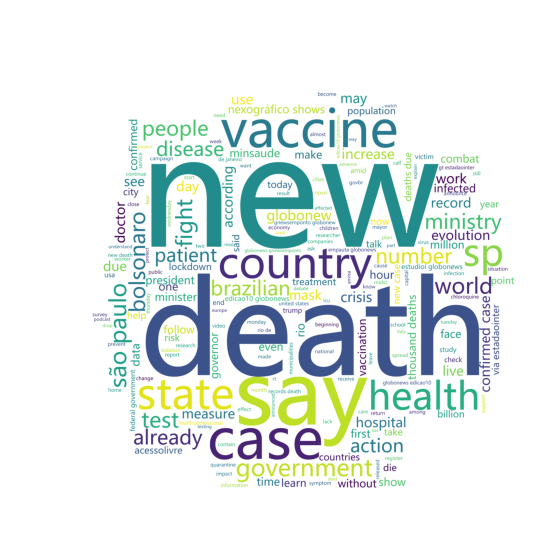

In [6]:
#BR
text = tweet[tweet['loc']=='BR']['text'].values
Plot_world(text)

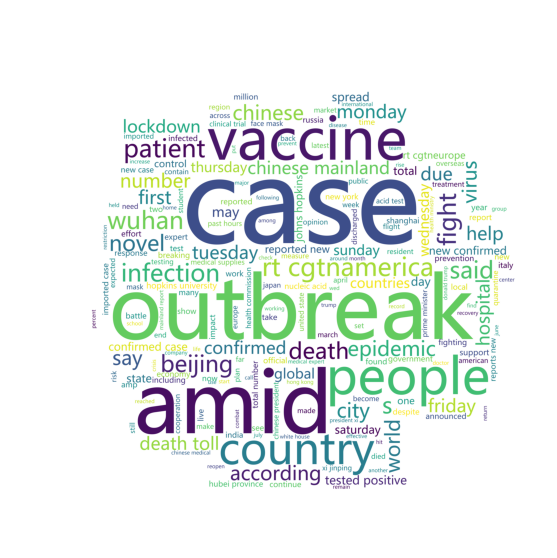

In [7]:
#CHINA
text = tweet[tweet['loc']=='CHINA']['text'].values
Plot_world(text)

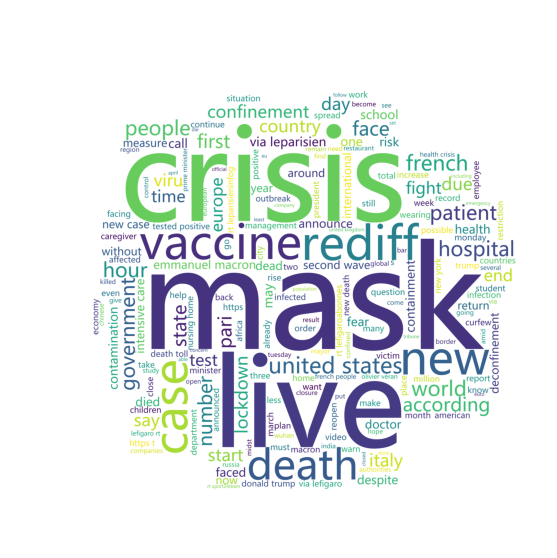

In [22]:
#FRANCE
text = tweet[tweet['loc']=='FRANCE']['text'].values
Plot_world(text)

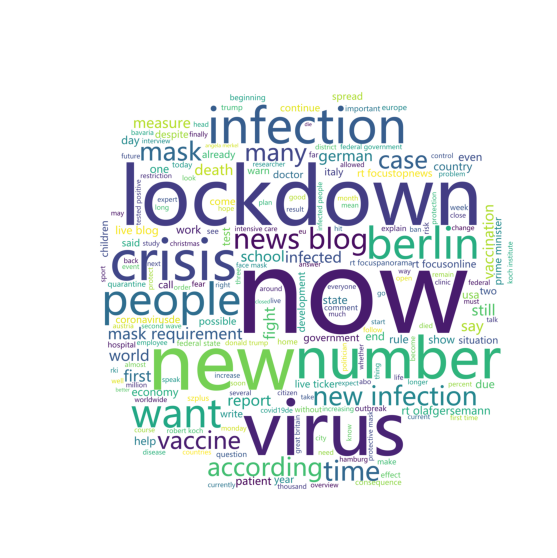

In [9]:
#GERMANY
text = tweet[tweet['loc']=='GERMANY']['text'].values
Plot_world(text)

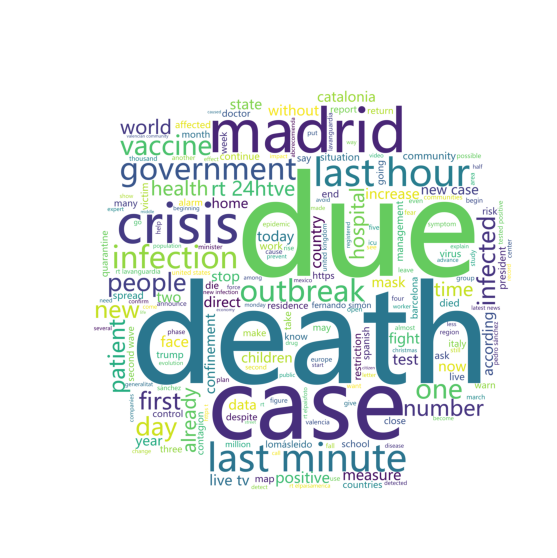

In [10]:
#SPAIN
text = tweet[tweet['loc']=='SPAIN']['text'].values
Plot_world(text)

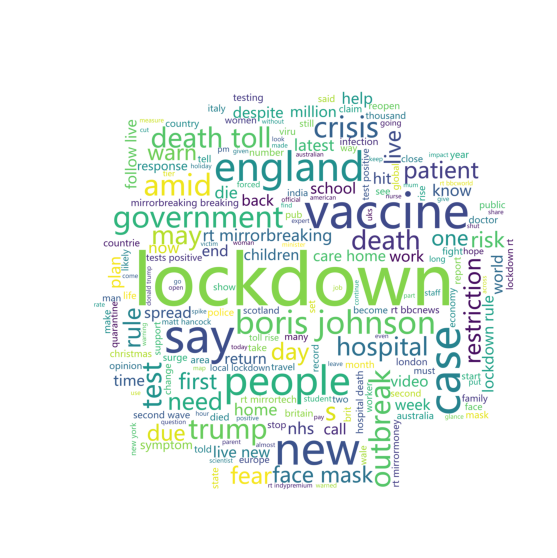

In [11]:
#UK
text = tweet[tweet['loc']=='UK']['text'].values
Plot_world(text)

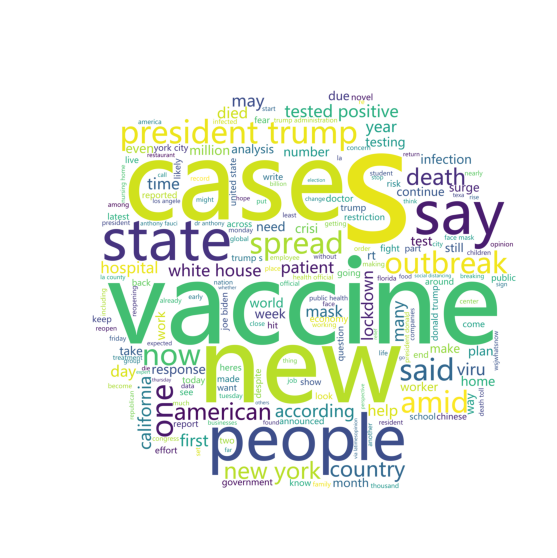

In [12]:
#US
text = tweet[tweet['loc']=='US']['text'].values
Plot_world(text)

# 各月词云

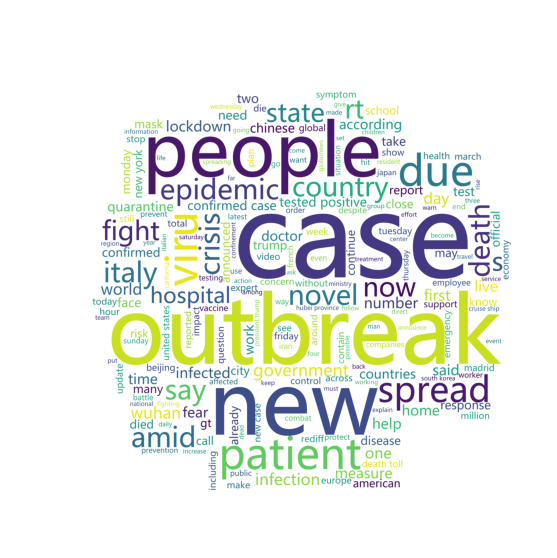

In [13]:
#第一季度
text = tweet[(tweet['Month'].isin(['1','2','3']))]['text'].values
Plot_world(text)

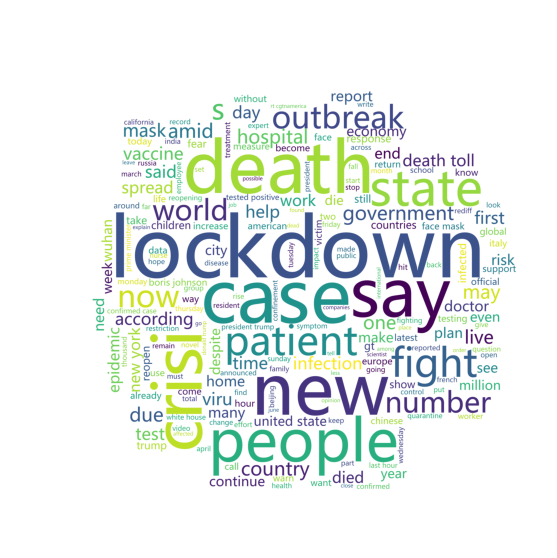

In [14]:
#第二季度
text = tweet[(tweet['Month'].isin(['4','5','6']))]['text'].values
Plot_world(text)

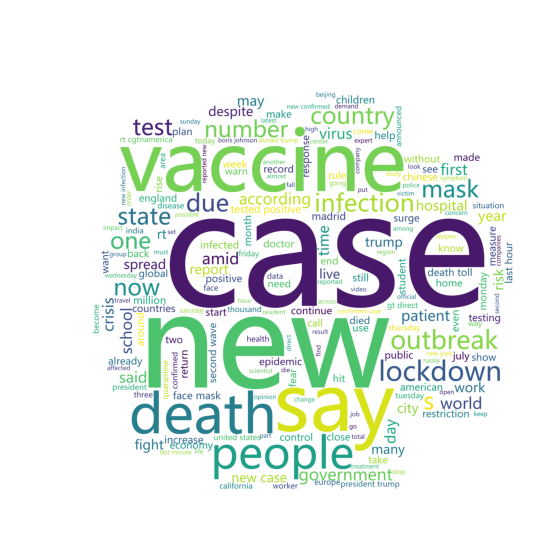

In [15]:
#第三季度
text = tweet[(tweet['Month'].isin(['7','8','9']))]['text'].values
Plot_world(text)

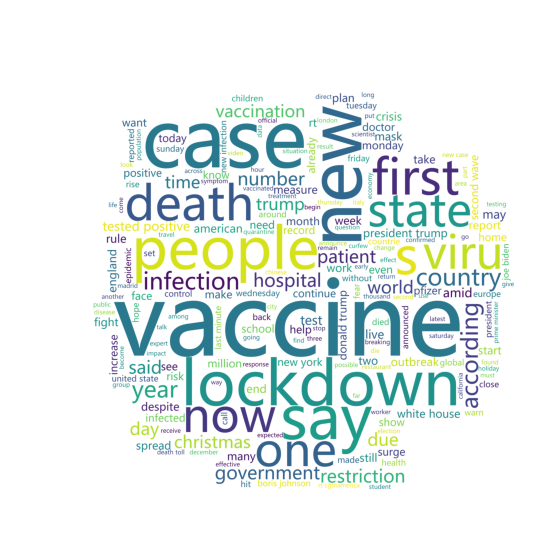

In [16]:
#第四季度
text = tweet[(tweet['Month'].isin(['10','11','12']))]['text'].values
Plot_world(text)